# Exploracion de datos de los emperadores del Imperio Romano

### En este analisis, veremos informacion sobre los emperadores que gobernaron a Roma luego de la caida de la Republica de Julio Cesar, y hasta la decision por parte de Theodosius de partir el imperior en 2. 
### Años que compone el estudio: 26 a.C. hasta 395 d.C.

### Columnas:

Name : Nombre identificador de cada emperador

Birth : Fecha de nacimiento

Death: Fecha de muerte

Birth city: Ciudad de nacimiento

Birth Province: Provincia de nacimiento

rise: Manera que asumió como emperador

Reign start: Comienzo del reino

Reign end: Fin del reino

Cause: Causa por el fin del reino

Killer: Responsable de la muerte del emperador

Dynasty: Dinastia a la cual pertenecia el emperador

Notes: Notas sobre estimaciones de fechas


###### Nota aclaratoria: Muchas de las fechas presentes son estimaciones con alto nivel de confianza, tanto para nacimiento como para el año de muerte del emperador.

###### Source: https://public.opendatasoft.com/explore/dataset/roman-emperors


### Importamos las librerias necesarias, como tambien el dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
emperors = pd.read_excel(r'C:\Users\Usuario\Desktop\Python\emperors\emperors_python\roman-emperors.xlsx')

In [4]:
emp = emperors.drop(['Index','Full Name','Era','Verif','Image'], axis = 1)

In [6]:
emp = pd.DataFrame(emp)

### Problema con fechas lejanas:
###### El 'timespan' integrado en la libreria pandas no se extiende a representar fechas a distancias mayores a 584 años , por eso, modificare columnas con fechas y agregare otras para poder medir tiempos en años. Tomare en cuenta solo los años sin meses ni dias. Los años antes de cristo se denotaran con un signo negativo. 

In [7]:
emp[['Birth','Death','Reign Start','Reign End']] = emp[['Birth','Death','Reign Start','Reign End']].apply(lambda x: x.str[:4]).astype(float)

,Name,Birth,Death,Birth City,Birth Province,rise,Reign Start,Reign End,Cause,Killer,Dynasty,Notes
0,Augustus,62.0,14.0,Rome,Italia,Birthright,26.0,14.0,Assassination,Wife,Julio-Claudian,"birth, reign.start are BCE. Assign negative fo..."
1,Tiberius,41.0,37.0,Rome,Italia,Birthright,14.0,37.0,Assassination,Other Emperor,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...
2,Caligula,12.0,41.0,Antitum,Italia,Birthright,37.0,41.0,Assassination,Senate,Julio-Claudian,assassination may have only involved the Praet...
3,Claudius,9.0,54.0,Lugdunum,Gallia Lugdunensis,Birthright,41.0,54.0,Assassination,Wife,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...
4,Nero,37.0,68.0,Antitum,Italia,Birthright,54.0,68.0,Suicide,Senate,Julio-Claudian,NaN
5,Galba,2.0,69.0,Terracina,Italia,Seized Power,68.0,69.0,Assassination,Other Emperor,Flavian,birth is BCE. Assign negative for correct ISO ...
6,Otho,32.0,69.0,Terentinum,Italia,Appointment by Praetorian Guard,69.0,69.0,Suicide,Other Emperor,Flavian,NaN
7,Vitellius,15.0,69.0,Rome,Italia,Seized Power,69.0,69.0,Assassination,Other Emperor,Flavian,NaN
8,Vespasian,9.0,79.0,Falacrine,Italia,Seized Power,69.0,79.0,Natural Causes,Disease,Flavian,NaN
9,Titus,39.0,81.0,Rome,Italia,Birthright,79.0,81.0,Natural Causes,Disease,Flavian,NaN


In [8]:
emp.iloc[[0,1,3,5],[1]] = (emp.iloc[[0,1,3,5],[1]].astype(float)) * -1

In [9]:
emp.iloc[0,6] = emp.iloc[0,6] * -1

In [10]:
print('Los años que se multiplicaron por -1 representan fechas antes de cristo')

Los años que se multiplicaron por -1 representan fechas antes de cristo


In [11]:
emp.head(5)

,Name,Birth,Death,Birth City,Birth Province,rise,Reign Start,Reign End,Cause,Killer,Dynasty,Notes
0,Augustus,-62.0,14.0,Rome,Italia,Birthright,-26.0,14.0,Assassination,Wife,Julio-Claudian,"birth, reign.start are BCE. Assign negative fo..."
1,Tiberius,-41.0,37.0,Rome,Italia,Birthright,14.0,37.0,Assassination,Other Emperor,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...
2,Caligula,12.0,41.0,Antitum,Italia,Birthright,37.0,41.0,Assassination,Senate,Julio-Claudian,assassination may have only involved the Praet...
3,Claudius,-9.0,54.0,Lugdunum,Gallia Lugdunensis,Birthright,41.0,54.0,Assassination,Wife,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...
4,Nero,37.0,68.0,Antitum,Italia,Birthright,54.0,68.0,Suicide,Senate,Julio-Claudian,NaN
5,Galba,-2.0,69.0,Terracina,Italia,Seized Power,68.0,69.0,Assassination,Other Emperor,Flavian,birth is BCE. Assign negative for correct ISO ...
6,Otho,32.0,69.0,Terentinum,Italia,Appointment by Praetorian Guard,69.0,69.0,Suicide,Other Emperor,Flavian,NaN
7,Vitellius,15.0,69.0,Rome,Italia,Seized Power,69.0,69.0,Assassination,Other Emperor,Flavian,NaN
8,Vespasian,9.0,79.0,Falacrine,Italia,Seized Power,69.0,79.0,Natural Causes,Disease,Flavian,NaN
9,Titus,39.0,81.0,Rome,Italia,Birthright,79.0,81.0,Natural Causes,Disease,Flavian,NaN


#### Agrego columnas para medir tiempos

Edad muerte : Edad que tenia el emperador al fallecer

Trono duracion: Cuanto tiempo duro como emperador

Edad Trono: La edad que tenia al asumir como emperador

In [12]:
emp['Edad muerte'] = emp['Death'] - emp['Birth'] 
emp['Trono duracion'] = emp['Reign End'] - emp['Reign Start']
emp['Edad Trono'] = emp['Reign Start'] - emp['Birth']
emp.head(5)

,Name,Birth,Death,Birth City,Birth Province,rise,Reign Start,Reign End,Cause,Killer,Dynasty,Notes,Edad muerte,Trono duracion,Edad Trono
0,Augustus,-62.0,14.0,Rome,Italia,Birthright,-26.0,14.0,Assassination,Wife,Julio-Claudian,"birth, reign.start are BCE. Assign negative fo...",76.0,40.0,36.0
1,Tiberius,-41.0,37.0,Rome,Italia,Birthright,14.0,37.0,Assassination,Other Emperor,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...,78.0,23.0,55.0
2,Caligula,12.0,41.0,Antitum,Italia,Birthright,37.0,41.0,Assassination,Senate,Julio-Claudian,assassination may have only involved the Praet...,29.0,4.0,25.0
3,Claudius,-9.0,54.0,Lugdunum,Gallia Lugdunensis,Birthright,41.0,54.0,Assassination,Wife,Julio-Claudian,birth is BCE. Assign negative for correct ISO ...,63.0,13.0,50.0
4,Nero,37.0,68.0,Antitum,Italia,Birthright,54.0,68.0,Suicide,Senate,Julio-Claudian,NaN,31.0,14.0,17.0
5,Galba,-2.0,69.0,Terracina,Italia,Seized Power,68.0,69.0,Assassination,Other Emperor,Flavian,birth is BCE. Assign negative for correct ISO ...,71.0,1.0,70.0
6,Otho,32.0,69.0,Terentinum,Italia,Appointment by Praetorian Guard,69.0,69.0,Suicide,Other Emperor,Flavian,NaN,37.0,0.0,37.0
7,Vitellius,15.0,69.0,Rome,Italia,Seized Power,69.0,69.0,Assassination,Other Emperor,Flavian,NaN,54.0,0.0,54.0
8,Vespasian,9.0,79.0,Falacrine,Italia,Seized Power,69.0,79.0,Natural Causes,Disease,Flavian,NaN,70.0,10.0,60.0
9,Titus,39.0,81.0,Rome,Italia,Birthright,79.0,81.0,Natural Causes,Disease,Flavian,NaN,42.0,2.0,40.0


## Emperadores que gobernaron por 1 año o más 

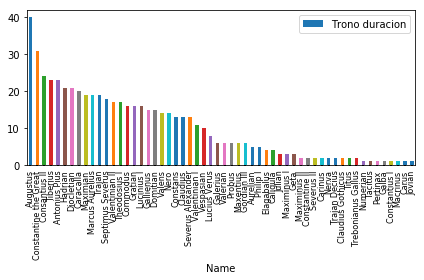

In [45]:
emp.sort_values(by = 'Trono duracion', ascending = False).head(56).plot(x = 'Name', y = 'Trono duracion', kind = 'bar')
plt.tick_params(axis='x',width = 2, length = 1,labelsize=8)
plt.tight_layout()
plt.show()

## Cuales fueron los emperadores que gobernaron por mayor tiempo?

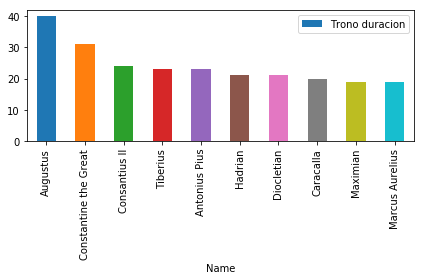

In [14]:
emp.sort_values(by = 'Trono duracion', ascending = False).head(10).plot(x = 'Name', y = 'Trono duracion', kind = 'bar')
plt.tight_layout()
plt.show()

## Por menor tiempo?

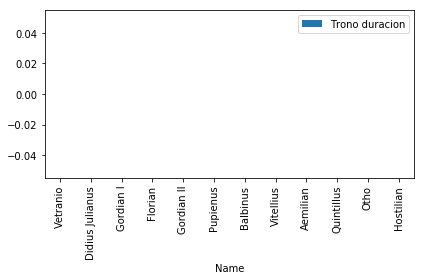

In [15]:
emp.sort_values(by = 'Trono duracion', ascending = False).tail(12).plot(x = 'Name', y = 'Trono duracion', kind = 'bar')
plt.tight_layout()
plt.show()

#### Estos emperadores no superaron un año como emperadores.

## Cuidades de nacimiento mas frecuentes de los emperadores

#### Sirmium o Sirmio fue una colonia romana durante el siglo uno, ubicado hoy en dia en Serbia. 

In [16]:
ciudades = emp.groupby('Birth City').size().sort_values(ascending = False)

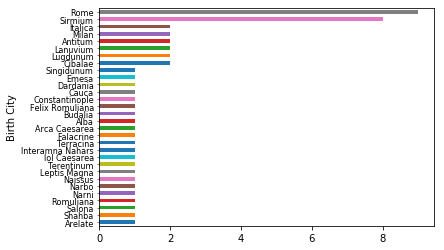

Birth City
Rome                9
Sirmium             8
Italica             2
Milan               2
Antitum             2
Lanuvium            2
Lugdunum            2
Cibalae             2
Emesa               1
Dardania            1
Cauca               1
Constantinople      1
Felix Romuliana     1
Budalia             1
Arelate             1
Arca Caesarea       1
Falacrine           1
Terracina           1
Interamna Nahars    1
Iol Caesarea        1
Terentinum          1
Leptis Magna        1
Naissus             1
Narbo               1
Narni               1
Romuliana           1
Salona              1
Shahba              1
Singidunum          1
Alba                1
dtype: int64


In [17]:
ciudades.sort_values().plot(kind = 'barh')
plt.tick_params(axis='y',width = 0.5, length = 2,labelsize=8)
plt.show()
print(ciudades)

## Observemos los emperadores mas jovenes/viejos al momento de asumir

In [19]:
youngest_emp = emp[['Name','Edad Trono']].set_index('Name').sort_values(by = 'Edad Trono').head(4)
oldest_emp = emp[['Name','Edad Trono']].dropna().set_index('Name').sort_values(by = 'Edad Trono').tail(4)

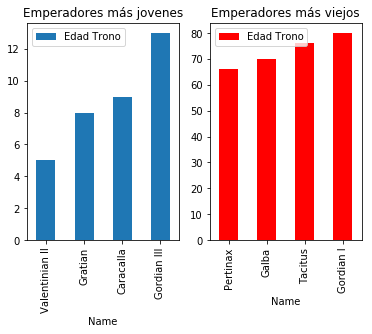

In [20]:
edades_fig = plt.figure()
joven = edades_fig.add_subplot(1,2,1)
youngest_emp.plot(ax = joven,kind = 'bar',title = 'Emperadores más jovenes')

viejos = edades_fig.add_subplot(1,2,2)
oldest_emp.plot(ax = viejos, kind = 'bar',title = 'Emperadores más viejos', color = 'red')

plt.show()

#### Distribucion de edad al asumir el trono. El promedio fue de 41 años, aunque han asumido niños de hasta 5 años por derecho natural, o ancianos de hasta 80 años. La mediana es tambien de 41 años, y la distribucion de la edad tiene una desviacion de casi 18 años. 

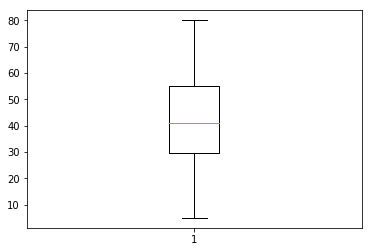

count    63.000000
mean     41.317460
std      17.797087
min       5.000000
25%      29.500000
50%      41.000000
75%      55.000000
max      80.000000
Name: Edad Trono, dtype: float64


In [21]:
plt.boxplot(emp['Edad Trono'].dropna())
plt.show()
print(emp['Edad Trono'].dropna().describe())

In [23]:
emp.rise.value_counts();

Birthright                         35
Seized Power                       10
Appointment by Army                 7
Appointment by Senate               7
Appointment by Emperor              4
Appointment by Praetorian Guard     3
Purchase                            1
Election                            1
Name: rise, dtype: int64

#### Observemos la causa en la tabla y el grafico por la cual asumieron poder los emperadores:

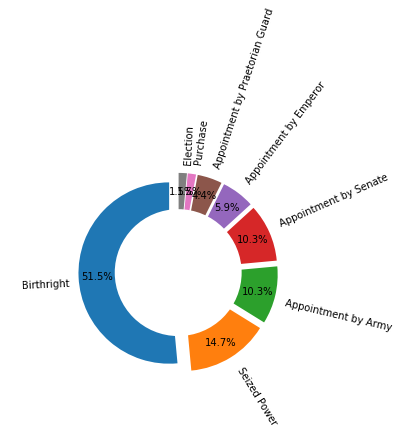

Birthright                         35
Seized Power                       10
Appointment by Army                 7
Appointment by Senate               7
Appointment by Emperor              4
Appointment by Praetorian Guard     3
Purchase                            1
Election                            1
Name: rise, dtype: int64


In [24]:
rise = emp.rise.value_counts()
labels_rise = rise.index
explode_rise = np.repeat(0.1,8)
fig1, ax1 = plt.subplots()
ax1.pie(rise,
labels=labels_rise,rotatelabels = True, autopct='%1.1f%%', startangle=90,pctdistance=0.8, explode = explode_rise)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
plt.show()
print(rise)


## Cuales fueron las causas mas frecuentes que destituyeron a un emperador?

In [25]:
causas = emp.Cause.value_counts()

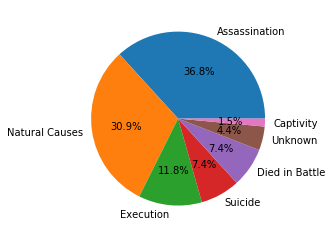

Assassination     25
Natural Causes    21
Execution          8
Suicide            5
Died in Battle     5
Unknown            3
Captivity          1
Name: Cause, dtype: int64


In [26]:
plt.pie(causas, labels = causas.index,autopct='%1.1f%%')
plt.show()
print(causas)

### Definicion de dinastia: Serie de reyes o soberanos que pertenecen a la misma familia. 

#### Cual fue la dinastia que gobernó por mas tiempo?

In [27]:
dinastia_duracion = emp.groupby('Dynasty')['Trono duracion'].sum().sort_values(ascending = False)

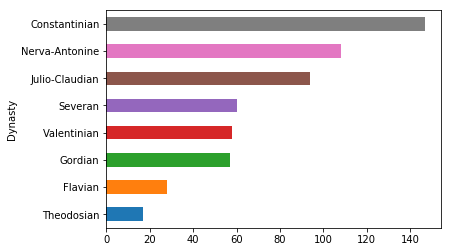

In [28]:
dinastia_duracion.sort_values().plot(kind = 'barh')
plt.show()

## Cuantos emperadores por cada dinastia?

In [29]:
dyn_size = emp.groupby('Dynasty').size().sort_values(ascending = False)

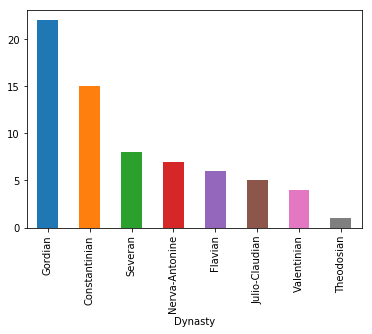

In [30]:
dyn_size.plot(kind = 'bar')
plt.show()

## Cuanto tiempo gobernaron cada emperador por dinastia?

##### Dinastias Valentinian, Severan, Nerva-Antonine, Julio-Claudian, Flavian

In [31]:
emp_dyn = pd.DataFrame(emp.groupby(['Dynasty','Name'])['Trono duracion'].sum().reset_index())
emp_dyn_sorted = emp_dyn.sort_values(by = ['Dynasty','Trono duracion'], ascending = False).set_index('Dynasty')

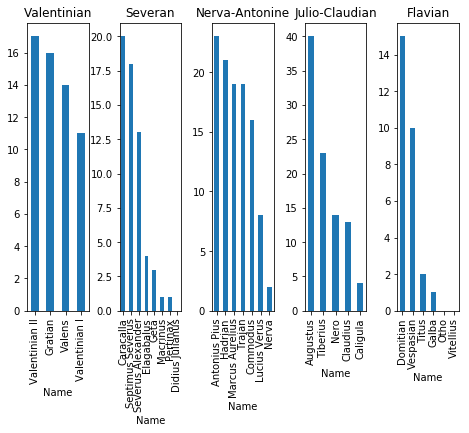

In [32]:
name_dyn = emp_dyn_sorted.index.unique()
name_dyn = name_dyn.drop(['Theodosian','Gordian','Constantinian'])
dyn_plot = plt.figure()

for nombre,ind in zip(name_dyn,range(1,9)):
    emp_dyn_filter = emp_dyn_sorted.loc[nombre,:]
    ax = dyn_plot.add_subplot(1,5,ind)
    emp_dyn_filter.plot(x = 'Name',title = nombre, ax = ax,legend =  False,kind = 'bar')
    
    
plt.subplots_adjust(left=3, bottom=1, right=4, top=2, wspace=0.5, hspace=1)
plt.show()

###### Dinastia Gordian (Observemos la cantidad de emperadores que fueron destituidos en esta querida familia!)

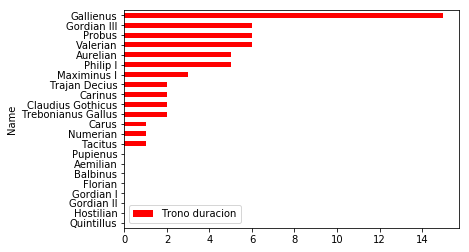

In [33]:
emp_dyn_sorted.loc['Gordian',:].sort_values(by = 'Trono duracion').plot(x = 'Name',kind = 'barh', color = 'red')
plt.show()

##### DInastia Constantinian

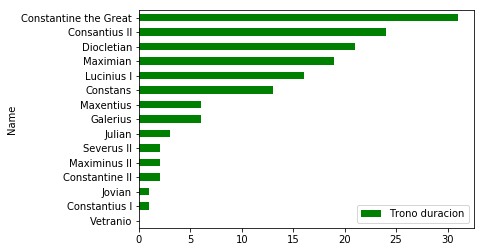

In [34]:
emp_dyn_sorted.loc['Constantinian',:].sort_values(by = 'Trono duracion').plot(x = 'Name',kind = 'barh', color = 'green')
plt.show()

## La dinastia teodisiana comienza bajo el reinato de Teodosio el Grande, que es famoso por haber tomado la decision de dividir el imperio romano en 2 partes, el occidente y el oriente ,dandole el poder a sus dos hijos Arcadio y Honorio, y de esta manera finaliza Roma como Imperio.  